# Benchmark results

This section investigates how scalable is our software. We report median run time, memory usage, and iteration number for our core functions `L0_normal_reg`, `L0_logistic_reg`, and `L0_poisson_reg` on 1 million SNPs with sample sizes ranging from 10000, 20000, ..., 120000 with 5 separate runs. Every run is performed on a intel-E5-2670 machine which has 63G of RAM and a single core 3.3GHz processor. 

In [1]:
using DelimitedFiles
using DataFrames
using Statistics
using Plots
using StatsPlots
using Measures

┌ Info: Recompiling stale cache file /Users/biona001/.julia/compiled/v1.0/StatsPlots/SiylL.ji for StatsPlots [f3b207a7-027a-5e70-b257-86293d7955fd]
└ @ Base loading.jl:1190


In [2]:
#specify directories for different benchmark results
dir_normal = "normal_results"
dir_normal_nodebias = "normal_results_nodebias"
dir_logistic = "logistic_results"
dir_logistic_nodebias = "logistic_results_nodebias"
dir_poisson = "poisson_results"
dir_poisson_nodebias = "poisson_results_nodebias"
dir_negativebinomial = "negativebinomial_results"
dir_negativebinomial_nodebias = "negativebinomial_results_nodebias"

all_dir = [dir_normal_nodebias; dir_normal; dir_logistic_nodebias; dir_logistic; 
        dir_poisson_nodebias; dir_poisson; dir_negativebinomial; dir_negativebinomial_nodebias]

8-element Array{String,1}:
 "normal_results_nodebias"          
 "normal_results"                   
 "logistic_results_nodebias"        
 "logistic_results"                 
 "poisson_results_nodebias"         
 "poisson_results"                  
 "negativebinomial_results"         
 "negativebinomial_results_nodebias"

## First read the benchmark results in, and print out failed results

In [3]:
all_benchmark_results = Vector{Matrix}(undef, 8)
for k in 1:length(all_dir)
    dir = all_dir[k]
    cur_response = zeros(12, 3)
    for i in 1:12
        a_particular_run = DataFrame(time=Float64[], memory=Float64[], iteration=Float64[])
        for j in 1:5
            file_dir  = dir * "/" * string(10000i) * "_by_1000000_run$j"
            file_dir2 = dir * "/" * string(10000i + 300) * "_by_1000000_run$j"
            
            if isfile(file_dir)
                tmp_run = readdlm(file_dir, ',', header=true)
                tmp_run[1][1] = tmp_run[1][1] / tmp_run[1][3] #divide time by iteration number
                tmp_run[1][2] = tmp_run[1][2] / 1000 #converg MB to GB
                push!(a_particular_run, tmp_run[1])
            elseif isfile(file_dir2)
                tmp_run = readdlm(file_dir2, ',', header=true)
                tmp_run[1][1] = tmp_run[1][1] / tmp_run[1][3] #divide time by iteration number
                tmp_run[1][2] = tmp_run[1][2] / 1000 #converg MB to GB
                push!(a_particular_run, tmp_run[1])
            else
                println(string(10000i) * " run $j for " * dir * " does not exist")
            end
        end
        
        cur_response[i, 1] = median(a_particular_run[:, 1])
        cur_response[i, 2] = median(a_particular_run[:, 2])
        cur_response[i, 3] = median(a_particular_run[:, 3])
    end
    all_benchmark_results[k] = cur_response
end

20000 run 3 for normal_results_nodebias does not exist
70000 run 3 for normal_results_nodebias does not exist
70000 run 4 for normal_results_nodebias does not exist
40000 run 5 for normal_results does not exist
50000 run 1 for normal_results does not exist
120000 run 5 for normal_results does not exist
120000 run 5 for poisson_results does not exist


In [4]:
model_sizes = collect(10:10:120)
normal_results_nodebias = all_benchmark_results[1]
normal_results = all_benchmark_results[2]
logistic_results_nodebias = all_benchmark_results[3]
logistic_results = all_benchmark_results[4]
poisson_results_nodebias = all_benchmark_results[5]
poisson_results = all_benchmark_results[6]
negativebinomial_results_nodebias = all_benchmark_results[7]
negativebinomial_results = all_benchmark_results[8]

12×3 Array{Float64,2}:
  58.1473  0.142539   9.0
 112.202   0.158961  13.0
 167.588   0.19524   13.0
 228.081   0.140529  10.0
 296.281   0.118337   7.0
 322.75    0.282461  26.0
 414.284   0.123937   7.0
 473.131   0.126737   7.0
 582.374   0.155723   4.0
 603.873   0.123526   6.0
 598.981   0.428508  19.0
 709.318   0.137937   7.0

In [17]:
poisson_results

12×3 Array{Float64,2}:
  54.894  0.242944  14.0
 104.083  0.615669  45.0
 162.464  0.35123   15.0
 214.67   0.472037  17.0
 265.495  0.464589  21.0
 307.218  3.23273   95.0
 376.792  0.591     16.0
 436.31   0.44916   13.0
 533.239  0.267048   6.0
 590.532  0.282798   6.0
 579.888  0.860157  24.0
 674.662  0.428932   9.0

In [18]:
poisson_results_nodebias

12×3 Array{Float64,2}:
  53.3414  0.258535   24.0
 103.493   0.5718     60.0
 156.481   0.368966   35.0
 209.075   0.354533   32.0
 261.129   0.376624   33.0
 306.355   1.20088   113.0
 375.597   0.238208   17.0
 441.863   0.182463   11.0
 489.883   0.221099   14.0
 552.049   0.193983   11.0
 564.221   0.903131   72.0
 650.582   0.241055   14.0

# Plot time/memory/iter, separating debias and no-debias

In [5]:
storage = 1000 .* model_sizes .* 10^7 * .2 .* 1.25e-10

no_debias_times = [normal_results_nodebias[:, 1] logistic_results_nodebias[:, 1] poisson_results_nodebias[:, 1] negativebinomial_results_nodebias[:, 1]]
yes_debias_times = [normal_results[:, 1] logistic_results[:, 1] poisson_results[:, 1] negativebinomial_results[:, 1]]
no_debias_memory = [normal_results_nodebias[:, 2] logistic_results_nodebias[:, 2] poisson_results_nodebias[:, 2] negativebinomial_results_nodebias[:, 2] storage]
yes_debias_memory = [normal_results[:, 2] logistic_results[:, 2] poisson_results[:, 2] negativebinomial_results[:, 2] storage]
no_debias_iter = [normal_results_nodebias[:, 3] logistic_results_nodebias[:, 3] poisson_results_nodebias[:, 3] negativebinomial_results_nodebias[:, 3]]
yes_debias_iter = [normal_results[:, 3] logistic_results[:, 3] poisson_results[:, 3] negativebinomial_results[:, 3]]

12×4 Array{Float64,2}:
 3.0  5.0  14.0   9.0
 2.0  2.0  45.0  13.0
 2.0  7.0  15.0  13.0
 2.0  2.0  17.0  10.0
 2.0  4.0  21.0   7.0
 3.0  5.0  95.0  26.0
 2.0  3.0  16.0   7.0
 2.0  6.0  13.0   7.0
 2.0  6.0   6.0   4.0
 2.0  2.0   6.0   6.0
 2.0  6.0  24.0  19.0
 2.0  2.0   9.0   7.0

## Begin plotting

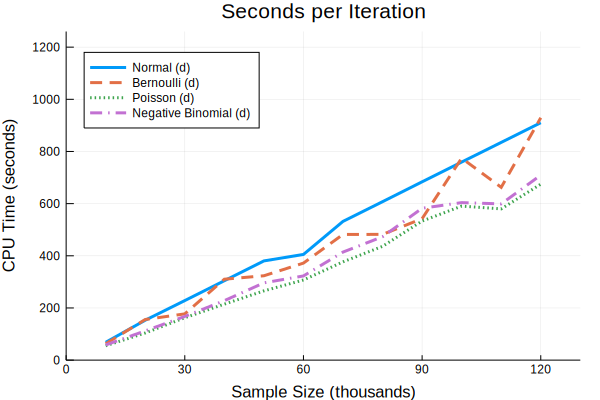

In [6]:
yes_debias_times_plot = plot(model_sizes, yes_debias_times, xlabel = "Sample Size (thousands)",
    ylabel = "CPU Time (seconds)", w=3, 
    lab = ["Normal (d)" "Bernoulli (d)" "Poisson (d)" "Negative Binomial (d)"], 
    legend=:topleft, xticks = 0:30:120, xlim = (0, 130), ylim = (0, 1260),
    linestyle = [:solid :dash :dot :dashdot], title = "Seconds per Iteration")

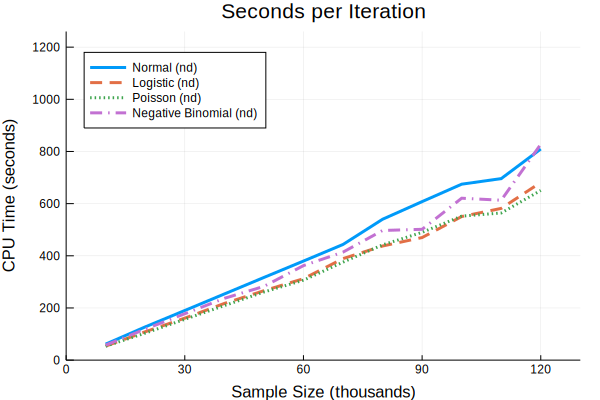

In [7]:
no_debias_times_plot = plot(model_sizes, no_debias_times, xlabel = "Sample Size (thousands)",
    ylabel = "CPU Time (seconds)", w=3, 
    lab = ["Normal (nd)" "Logistic (nd)" "Poisson (nd)" "Negative Binomial (nd)"], 
    legend=:topleft, xticks = 0:30:120, xlim = (0, 130), ylim = (0, 1260),
    linestyle = [:solid :dash :dot :dashdot], title = "Seconds per Iteration")

In [8]:
#(d) = yes debias, (nd) = no-debias

yes_debias_times_plot = plot(model_sizes, yes_debias_times, xlabel = "Sample Size (thousands)",
    ylabel = "CPU Time (seconds)", w=3, lab = ["Normal (d)" "Bernoulli (d)" "Poisson (d)" "Negative Bin (d)"], 
    legend=:topleft, xticks = 0:30:120, xlim = (0, 130), ylim = (0, 1390),
    linestyle = [:solid :dash :dot :dashdot], title = "Seconds per Iteration")

no_debias_times_plot = plot(model_sizes, no_debias_times, xlabel = "Sample Size (thousands)",
    ylabel = "CPU Time (seconds)", w=3, lab = ["Normal (nd)" "Bernoulli (nd)" "Poisson (nd)" "Negative Bin (nd)"], 
    legend=:topleft, xticks = 0:30:120, xlim = (0, 130), ylim = (0, 1390),
    linestyle = [:solid :dash :dot :dashdot], title = "Seconds per Iteration")

yes_debias_memory_plot = plot(model_sizes, yes_debias_memory, xlabel = "Sample Size (thousands)",
    ylabel = "Memory (GB)", w=3, lab = ["Normal (d)" "Bernoulli (d)" "Poisson (d)" "Negative Bin (d)" "Matrix size"], 
    legend=:topleft, xticks = 0:30:120, xlim = (0, 130), 
    linestyle = [:solid :dash :dot :dashdot :dashdotdot], title = "Memory Usage")

no_debias_memory_plot = plot(model_sizes, no_debias_memory, xlabel = "Sample Size (thousands)",
    ylabel = "Memory (GB)", w=3, lab = ["Normal (nd)" "Bernoulli (nd)" "Poisson (nd)" "Negative Bin (nd)" "Matrix size"], 
    legend=:topleft, xticks = 0:30:120, xlim = (0, 130), 
    linestyle = [:solid :dash :dot :dashdot :dashdotdot], title = "Memory Usage")

yes_debias_iter_plot = plot(model_sizes, yes_debias_iter, xlabel = "Sample Size (thousands)",
    ylabel = "Number of Iterations", w=3, lab = ["Normal (d)" "Bernoulli (d)" "Poisson (d)" "Negative Bin (d)"], 
    legend=:topleft, xticks = 0:30:120, xlim = (0, 130), ylim = (0, 180),
    linestyle = [:solid :dash :dot :dashdot], title = "Number of Iterations")

no_debias_iter_plot = plot(model_sizes, no_debias_iter, xlabel = "Sample Size (thousands)",
    ylabel = "Number of Iterations", w=3, lab = ["Normal (nd)" "Bernoulli (nd)" "Poisson (nd)" "Negative Bin (nd)"],
    legend=:topleft, xticks = 0:30:120, xlim = (0, 130), ylim = (0, 180),
    linestyle = [:solid :dash :dot :dashdot], title = "Number of Iterations");

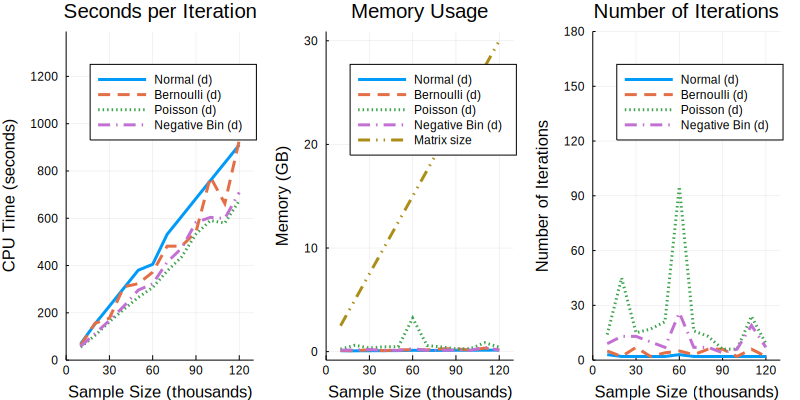

In [9]:
yes_debias_plots = [yes_debias_times_plot yes_debias_memory_plot yes_debias_iter_plot]
yes_debias = plot(yes_debias_plots..., layout = (1, 3), size = (800, 400))

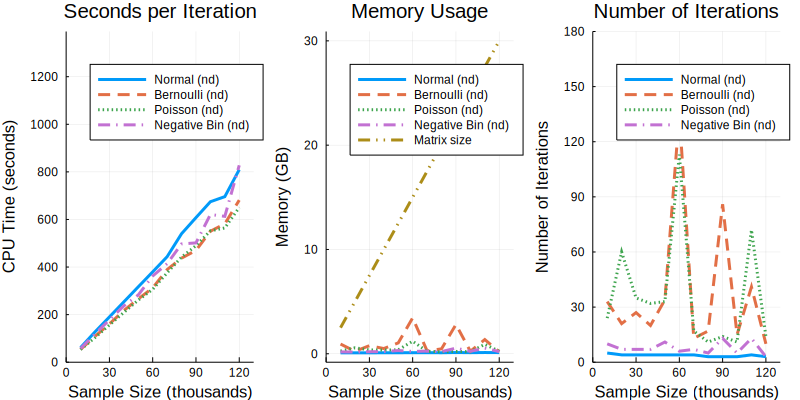

In [10]:
no_debias_plots = [no_debias_times_plot no_debias_memory_plot no_debias_iter_plot]
no_debias = plot(no_debias_plots..., layout = (1, 3), size = (800, 400))

# Save previous 2 plots in high resolution

In [11]:
yes_debias = plot(yes_debias_plots..., layout = (1, 3), size = (800, 400), dpi=300)
no_debias = plot(no_debias_plots..., layout = (1, 3), size = (800, 400), dpi=300)
savefig(yes_debias, "yes_debias")
savefig(no_debias, "no_debias")

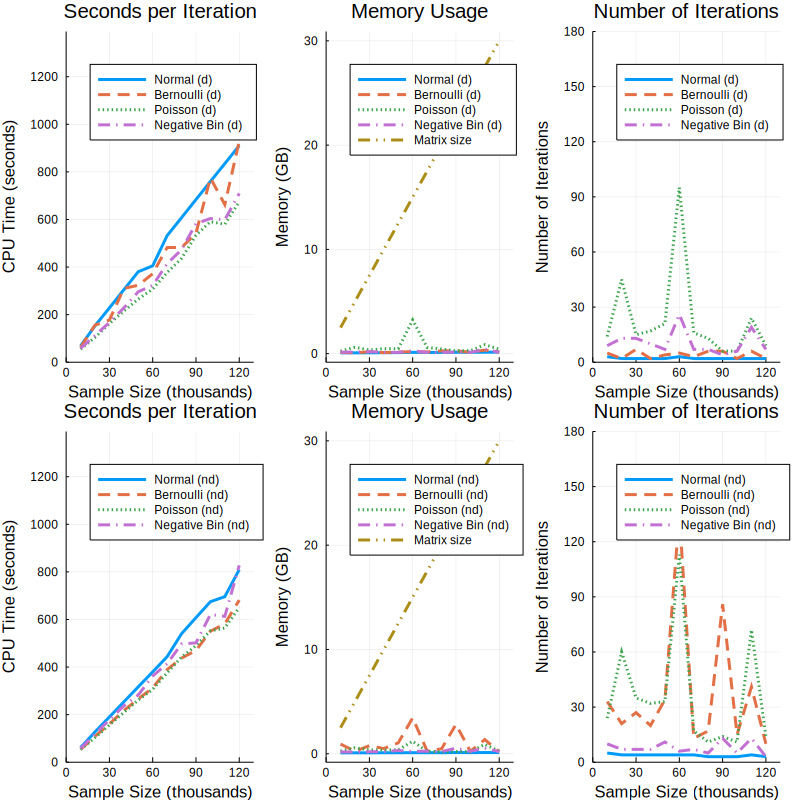

In [12]:
all_plots = [yes_debias_times_plot yes_debias_memory_plot yes_debias_iter_plot no_debias_times_plot no_debias_memory_plot no_debias_iter_plot]
plt = plot(all_plots..., layout = (2,3), size = (800, 800))